# Student Stress Level Analysis and Prediction

This notebook performs Exploratory Data Analysis (EDA) and trains a Random Forest model to predict student stress levels.

## 1. Import Required Libraries

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set style for plots
plt.style.use('default')  # Use default style
sns.set_theme()  # Apply seaborn theme

## 2. Load and Prepare Dataset

In [3]:
# Load the dataset
df = pd.read_csv('ProjectsGH/StressLevelDataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nFirst few rows:")
df.head()

Dataset Shape: (1100, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found")

# Display basic statistics
print("\nBasic statistics:")
df.describe()

Missing values in each column:
No missing values found

Basic statistics:


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


## 3. Exploratory Data Analysis

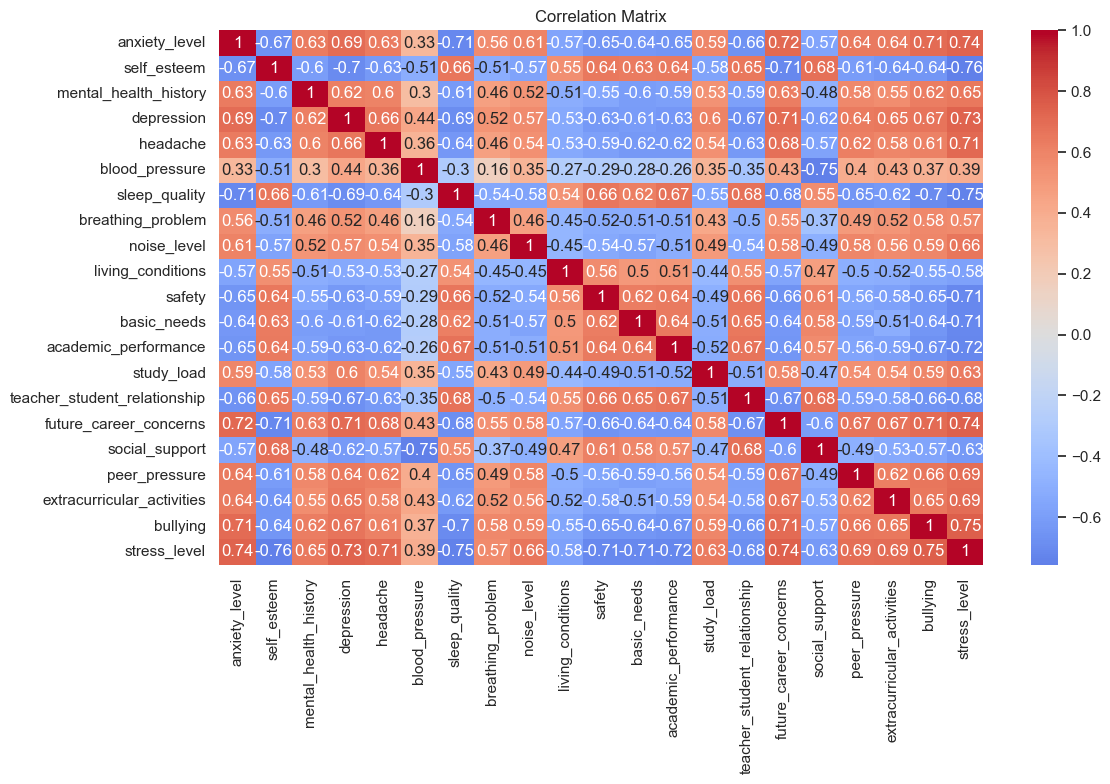

In [5]:
# Correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

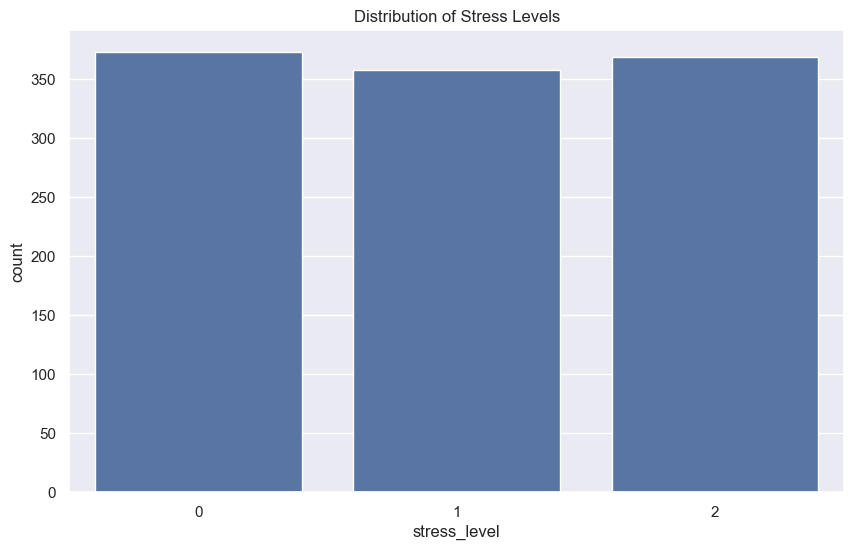

In [6]:
# Distribution of stress levels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='stress_level')
plt.title('Distribution of Stress Levels')
plt.show()

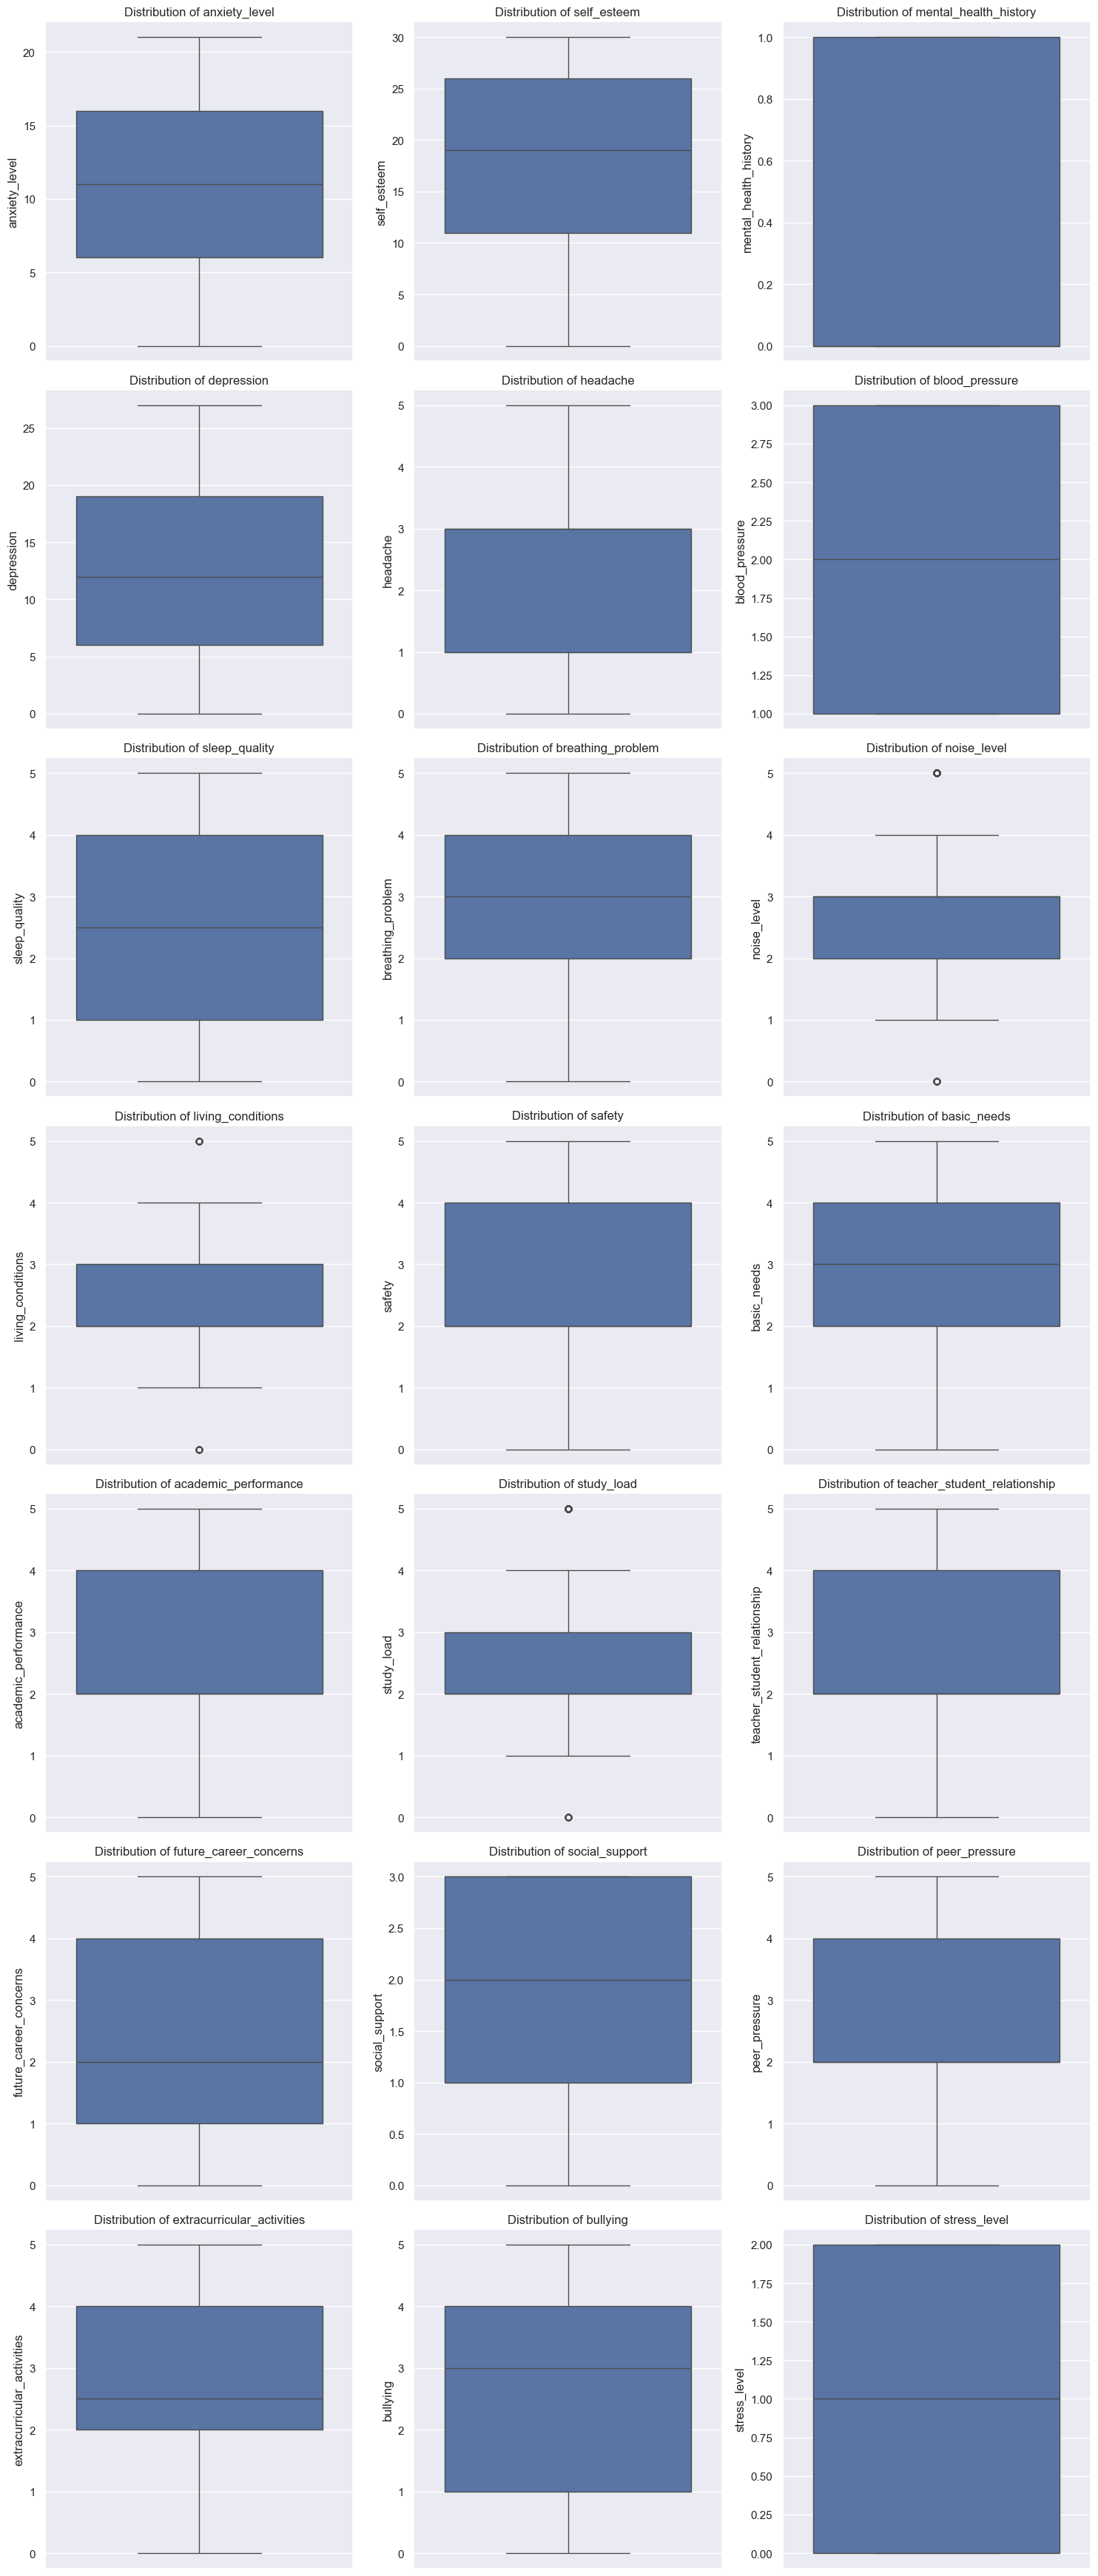

In [7]:
# Create box plots for numerical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')

# Remove empty subplots if any
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [8]:
# Separate features and target
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (880, 20)
Testing set shape: (220, 20)


## 5. Model Training and Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        76
           1       0.90      0.86      0.88        73
           2       0.90      0.86      0.88        71

    accuracy                           0.87       220
   macro avg       0.88      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



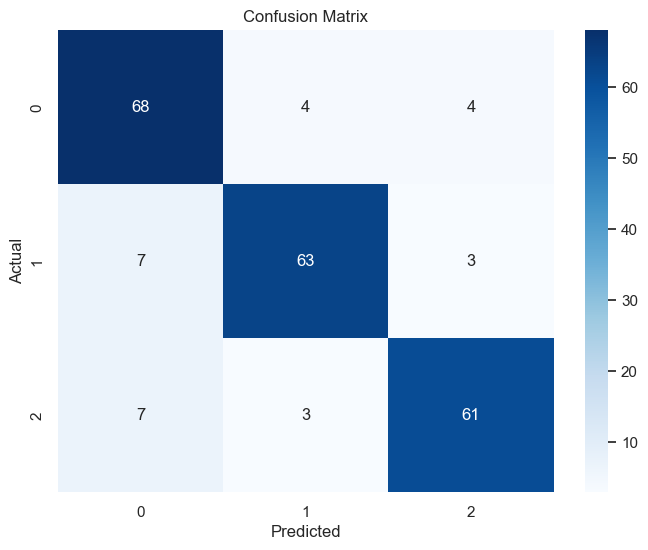

In [9]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())
print("CV score standard deviation:", cv_scores.std())

Cross-validation scores: [0.91477273 0.85227273 0.89772727 0.85795455 0.86931818]
Average CV score: 0.878409090909091
CV score standard deviation: 0.023998536456753275


## 6. Feature Importance Analysis

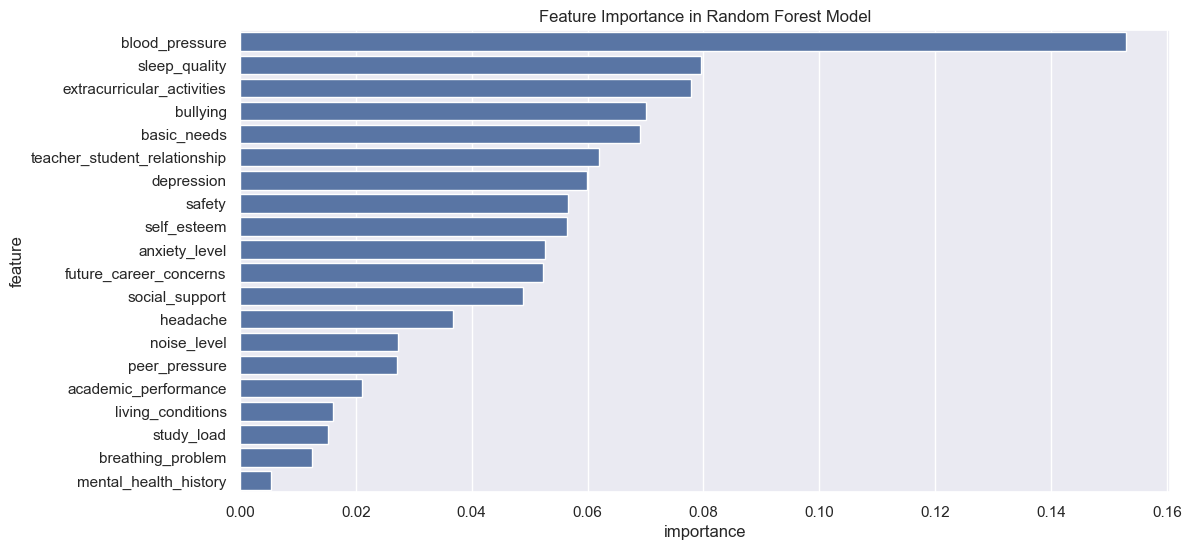

In [11]:
# Get feature importance scores
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()

## 7. Model Prediction Function

In [12]:
def predict_stress_level(data):
    """
    Predict stress level for new data
    
    Parameters:
    data (dict): Dictionary containing feature values
    
    Returns:
    int: Predicted stress level
    """
    # Convert input data to DataFrame
    input_df = pd.DataFrame([data])
    
    # Scale the input data
    input_scaled = scaler.transform(input_df)
    
    # Make prediction
    prediction = rf_model.predict(input_scaled)
    
    return prediction[0]

# Example usage
sample_data = X_test.iloc[0].to_dict()
print("Sample input data:", sample_data)
prediction = predict_stress_level(sample_data)
print("\nPredicted stress level:", prediction)
print("Actual stress level:", y_test.iloc[0])

Sample input data: {'anxiety_level': 21, 'self_esteem': 15, 'mental_health_history': 1, 'depression': 26, 'headache': 3, 'blood_pressure': 3, 'sleep_quality': 1, 'breathing_problem': 5, 'noise_level': 3, 'living_conditions': 1, 'safety': 2, 'basic_needs': 1, 'academic_performance': 2, 'study_load': 5, 'teacher_student_relationship': 1, 'future_career_concerns': 5, 'social_support': 1, 'peer_pressure': 5, 'extracurricular_activities': 5, 'bullying': 5}

Predicted stress level: 2
Actual stress level: 2


## 8. Save the Model

In [13]:
import joblib

# Save the model and scaler
joblib.dump(rf_model, 'stress_level_model.joblib')
joblib.dump(scaler, 'stress_level_scaler.joblib')
print("Model and scaler saved successfully!")

Model and scaler saved successfully!
